# Skalierung vs. Transformation

Wo liegt der Unterschied zwischen Skalierung und Transformation? 

Tatsächlich gibt es eine kleine, aber wichtige Unterscheidung zwischen *Skalierung* und *Transformation* im Kontext der Datenvorverarbeitung (Preprocessing):

- **Skalierung** ist eine spezielle Art von Transformation, die Daten in einen bestimmten Bereich bringt (z. B. mit Min-Max auf 0 bis 1 oder mit z-Score den Mittelwert auf 0 und die Standardabweichung auf 1).

- **Transformation**ist der Oberbegriff für jede Art von Änderung an Daten, wie **Skalierung**, **One-Hot-Encoding** oder das Entfernen von Ausreißern etc.

### Warum braucht man `fit()` und `transform()` als separate Schritte?

1. **`fit()`** wird auf den Trainingsdaten ausgeführt, um deren Eigenschaften (z. B. Mittelwert und Standardabweichung) zu „lernen“ und das Ergebnis als optimale Parameter zurück zu geben. Diese Werte sind für das Training und die spätere Vorhersage entscheidend, da sie den Maßstab der Trainingsdaten definieren.

2. **`transform()`** wird sowohl auf Trainings- als auch auf Testdaten angewendet, um die gleiche Transformation auf beiden anzuwenden, basierend auf den Werten, die `fit()` gelernt hat. Dies verhindert, dass die Testdaten das Modell beeinflussen, und stellt sicher, dass die Testdaten im gleichen Maßstab wie die Trainingsdaten verarbeitet werden.

# Praxis Beispiel

Angenommen, wir haben Trainingsdaten, die sich um den Bereich von 80 bis 120 bewegen, und die zugehörigen Zielwerte (`target_data`), die mit den Trainingsdaten in Beziehung stehen.

## Schritt 1: Fitting

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Beispiel-Daten
train_data = np.array([80, 90, 100, 110, 120]).reshape(-1, 1)  # Trainingsdaten
target_data = np.array([82, 88, 95, 102, 108])  # Zielwerte (z.B. Preis, Höhe)

# Erstellen eines Linearmodells für die Rohdaten
model_raw = LinearRegression()
model_raw.fit(train_data, target_data)
predictions_raw = model_raw.predict(train_data)

# StandardScaler initialisieren und fitten
scaler = StandardScaler()
scaler.fit(train_data)


StandardScaler()

Beachte hier, dass `fit()` zwei mal aufgerufen wird. 

Als erstes mit `model_raw.fit()` um ein Linearmodell zu erstellen und es auf den **Rohdaten** `train_data` und den dazugehörigen Zielwerten `target_data` zu trainieren. Mit diesem Modell wird eine lineare Vorhersage (`predictions_raw`) generiert, die die Beziehung zwischen Eingabewerten (`train_data`) und Zielwerten (`target_data`) zeigt.

Das zweite mal wird es als `scaler.fit()` auf dem initialisierten `StandardScaler` aufgerufen und auf die Trainingsdaten (`train_data`) angewendet, um den Mittelwert und die Standardabweichung zu berechnen die für die spätere Transformation gespeichert werden.

## Schritt 2: Scaling

In [19]:
# Transformieren der Trainingsdaten
train_data_scaled = scaler.transform(train_data)

# Erstellen eines Linearmodells für die transformierten Daten
model_scaled = LinearRegression()
model_scaled.fit(train_data_scaled, target_data)
predictions_scaled = model_scaled.predict(train_data_scaled)

# Skalieren der Testdaten mit den bereits berechneten Parametern
test_data_scaled = scaler.transform(test_data)

Nach der Anpassung des `StandardScaler` in Schritt 1 werden die **Trainingsdaten** mithilfe von `scaler.transform()` skaliert / transformiert. Das Ergebnis, `train_data_scaled`, enthält die skalierten Werte, die auf einer einheitlichen Skala basieren, wodurch die Daten zentriert (Mittelwert = 0) und normiert (Skala auf einen bestimmten bereich gebracht) sind.

$$
z = \frac{x - \text{Mittelwert}}{\text{Standardabweichung}}
$$

Anschließend wird ein weiteres Linearmodell `model_scaled` erstellt, das speziell auf den transformierten Trainingsdaten trainiert wird. Mit dem Aufruf von `model_scaled.fit(train_data_scaled, target_data)` lernt das Modell die Beziehung zwischen den skalierten Eingabewerten (`train_data_scaled`) und den entsprechenden Zielwerten (`target_data`). 

Die linearen Vorhersagen, die auf diesen skalierten Daten basieren, werden in `predictions_scaled` gespeichert, wodurch die Beziehung zwischen den transformierten Eingabewerten und den Zielwerten erfasst wird.

**Bei den Testdaten** kann dieselbe Transformation durchgeführt werden, ohne diese Daten erneut zu fitten. Das bedeutet, dass der StandardScaler die gleichen Transformationsparameter (Mittelwert und Standardabweichung) auf die Testdaten anwendet, sodass die Skala zwischen Trainings- und Testdaten konsistent bleibt. Siehe bitte Beispiel 2.

## Schritt 3: Vergleich der Grafiken

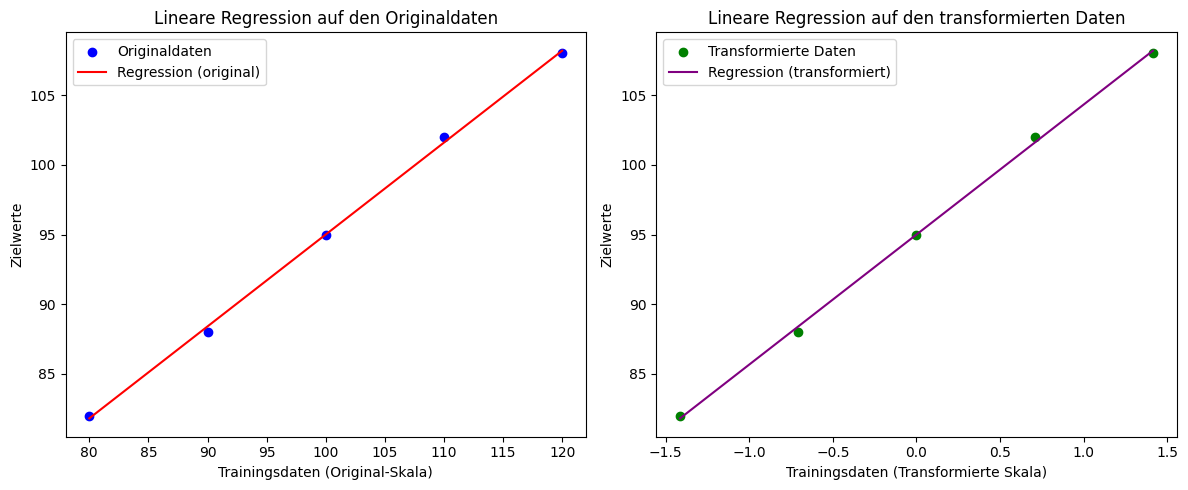

In [20]:
# Plot: Vor und nach der Transformation
plt.figure(figsize=(12, 5))

# Originaldaten und deren Regression
plt.subplot(1, 2, 1)
plt.scatter(train_data, target_data, color='blue', label="Originaldaten")
plt.plot(train_data, predictions_raw, color='red', label="Regression (original)")
plt.xlabel("Trainingsdaten (Original-Skala)")
plt.ylabel("Zielwerte")
plt.title("Lineare Regression auf den Originaldaten")
plt.legend()


# Transformierte Daten und deren Regression
plt.subplot(1, 2, 2)
plt.scatter(train_data_scaled, target_data, color='green', label="Transformierte Daten")
plt.plot(train_data_scaled, predictions_scaled, color='purple', label="Regression (transformiert)")
plt.xlabel("Trainingsdaten (Transformierte Skala)")
plt.ylabel("Zielwerte")
plt.title("Lineare Regression auf den transformierten Daten")
plt.legend()

plt.tight_layout()
plt.show()

Das Model bleibt (in diesem Fall) gleich, nur die Skala ändert sich. Dafür die Original Daten (die natürlich weiter existieren) ins neue Format umgerechnet werden. 

In [21]:
import pandas as pd

# Transformierte Trainingsdaten erstellen
train_data_transformed = scaler.transform(train_data)

# DataFrame erstellen, um die Daten als Tabelle darzustellen
data_comparison = pd.DataFrame({
    'Originaldaten': train_data.flatten(),
    'Transformierte Daten': train_data_transformed.flatten()
})

# Tabelle anzeigen
print(data_comparison)


   Originaldaten  Transformierte Daten
0             80             -1.414214
1             90             -0.707107
2            100              0.000000
3            110              0.707107
4            120              1.414214


# Zusammenfassung:

1. **Modell trainieren**: Ein erstes Modell (`model_raw`) wird mit den Rohdaten (`train_data`) und den Zielwerten (`target_data`) trainiert.

2. **Parameter berechnen**: Der `StandardScaler` wird mit `scaler.fit(train_data)` auf die Trainingsdaten angewendet, um den Mittelwert und die Standardabweichung zu berechnen.

3. **Daten transformieren**: Die Trainingsdaten werden mit `train_data_scaled = scaler.transform(train_data)`skaliert.

4. **Modell erneut trainieren**: Das Modell (`model_scaled`) wird mit den transformierten Daten (`train_data_scaled`) und den Zielwerten (`target_data`) erneut trainiert.

5. **Vorhersagen treffen**: Schließlich werden Vorhersagen mit den transformierten Trainingsdaten erstellt: `predictions_scaled = model_scaled.predict(train_data_scaled)`.

Dieser Ablauf sorgt dafür, dass das Modell optimal auf die skalierten Daten trainiert wird, was zu genaueren Vorhersagen führt.

# Beispiel 2 mit Test-Datensatz

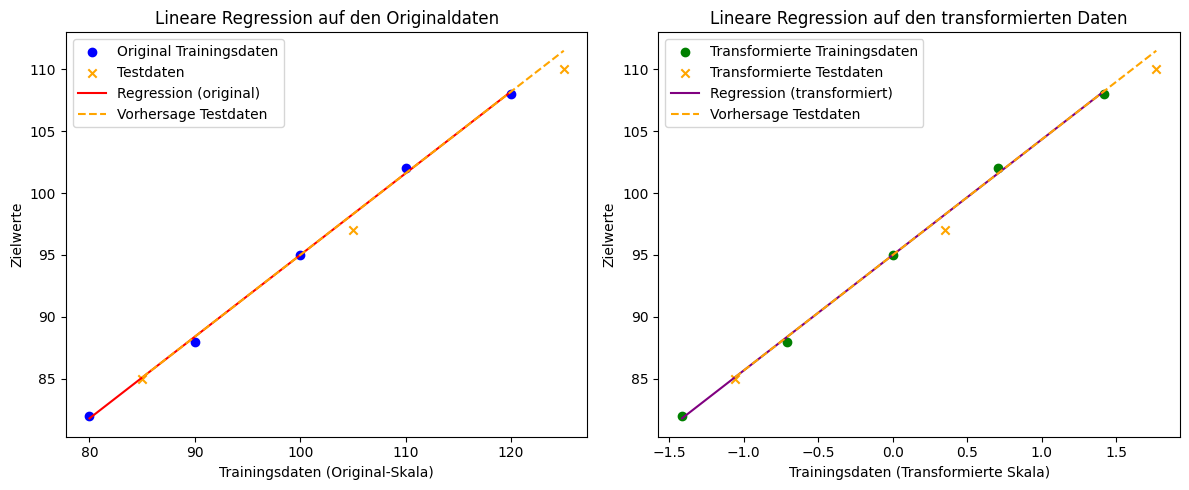

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Beispiel-Daten
train_data = np.array([80, 90, 100, 110, 120]).reshape(-1, 1)  # Trainingsdaten
target_data = np.array([82, 88, 95, 102, 108])  # Zielwerte (z.B. Preis, Höhe)

# Testdaten (neue Datenpunkte zur Überprüfung)
test_data = np.array([85, 105, 125]).reshape(-1, 1)  # Testdaten
test_target = np.array([85, 97, 110])  # Zielwerte für Testdaten (z.B. hypothetische Werte)

# Erstellen eines Linearmodells für die Rohdaten
model_raw = LinearRegression()
model_raw.fit(train_data, target_data)
predictions_raw = model_raw.predict(train_data)

# Vorhersagen für die Testdaten mit dem Modell auf Rohdaten
predictions_test_raw = model_raw.predict(test_data)

# StandardScaler initialisieren und fitten
scaler = StandardScaler()
scaler.fit(train_data)

# Transformieren der Trainingsdaten
train_data_scaled = scaler.transform(train_data)

# Transformieren der Testdaten mit den bereits berechneten Parametern
test_data_scaled = scaler.transform(test_data)

# Erstellen eines Linearmodells für die transformierten Daten
model_scaled = LinearRegression()
model_scaled.fit(train_data_scaled, target_data)
predictions_scaled = model_scaled.predict(train_data_scaled)

# Vorhersagen für die Testdaten mit dem Modell auf transformierten Daten
predictions_test_scaled = model_scaled.predict(test_data_scaled)

# Plot: Vor und nach der Transformation
plt.figure(figsize=(12, 5))

# Originaldaten und deren Regression
plt.subplot(1, 2, 1)
plt.scatter(train_data, target_data, color='blue', label="Original Trainingsdaten")
plt.scatter(test_data, test_target, color='orange', marker='x', label="Testdaten")
plt.plot(train_data, predictions_raw, color='red', label="Regression (original)")
plt.plot(test_data, predictions_test_raw, color='orange', linestyle='--', label="Vorhersage Testdaten")
plt.xlabel("Trainingsdaten (Original-Skala)")
plt.ylabel("Zielwerte")
plt.title("Lineare Regression auf den Originaldaten")
plt.legend()

# Transformierte Daten und deren Regression
plt.subplot(1, 2, 2)
plt.scatter(train_data_scaled, target_data, color='green', label="Transformierte Trainingsdaten")
plt.scatter(test_data_scaled, test_target, color='orange', marker='x', label="Transformierte Testdaten")
plt.plot(train_data_scaled, predictions_scaled, color='purple', label="Regression (transformiert)")
plt.plot(test_data_scaled, predictions_test_scaled, color='orange', linestyle='--', label="Vorhersage Testdaten")
plt.xlabel("Trainingsdaten (Transformierte Skala)")
plt.ylabel("Zielwerte")
plt.title("Lineare Regression auf den transformierten Daten")
plt.legend()

plt.tight_layout()
plt.show()
